In [2]:
from serenityff.torsion.tree.dash_tree import DASHTorsionTree
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
from rdkit.Chem.Draw.IPythonConsole import py3Dmol, drawMol3D
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from serenityff.charge.gnn.utils.rdkit_helper import get_all_torsion_angles, get_torsion_angle

In [3]:
sdf_suply="../data/example.sdf" 
tree_path = "./example_tree_out"
mol_sup = Chem.SDMolSupplier(sdf_suply, removeHs=False)

In [4]:
tree = DASHTorsionTree(tree_folder_path=tree_path)

Loading DASH tree data
Loaded 3685 trees and data


In [5]:
test_mol = mol_sup[8]
drawMol3D(test_mol, size=(400,400))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

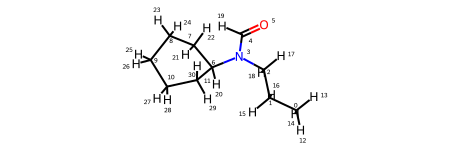

In [6]:
test_mol

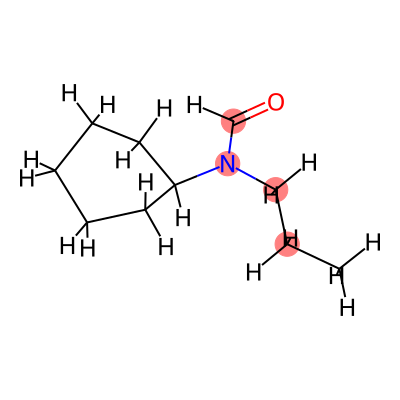

In [7]:
Draw.MolToImage(test_mol, size=(400,400), highlightAtoms=[1, 2, 3, 4])

In [8]:
Chem.MolToSmiles(test_mol)

'[H]C(=O)N(C([H])([H])C([H])([H])C([H])([H])[H])C1([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C1([H])[H]'

In [9]:
node_path = tree.match_new_torsion(atoms_in_torsion=[1, 2, 3, 4], mol=test_mol)
node_path2 = tree.match_new_torsion(atoms_in_torsion=[0, 1, 2, 3], mol=test_mol)
node_path3 = tree.match_new_torsion(atoms_in_torsion=[4, 3, 6, 7], mol=test_mol)
node_path4 = tree.match_new_torsion(atoms_in_torsion=[7, 8, 9, 10], mol=test_mol)
print(node_path)

[23234418, 0, 1, 15, 16, 17, 18, 19, 20, 21]


In [10]:
tree.data_storage[23234418].iloc[21]

level                                                            9
atom_type                                                       23
con_atom                                                         8
con_type                                                         1
max_attention                                               0.0163
size                                                             3
histogram        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 21, dtype: object

In [11]:
tree.tree_storage[23234418][0]

(0,
 23234418,
 -1,
 -1,
 0.0,
 [1, 28, 85, 109, 121, 219, 245, 255, 454, 496, 533, 554])

In [43]:
def draw_torsion_histogram(node_path, i):
    hist_data = np.array(tree.data_storage[node_path[0]].iloc[node_path[i]]["histogram"])
    max_freq = max(hist_data)
    hist_data = hist_data / max_freq
    fig, ax = plt.subplots(figsize=(5, 5))
    # fix for wrong angle scaling
    hist_data = hist_data[25:75]
    ax.plot(np.linspace(-180, 180, len(hist_data)), hist_data, color="C2")
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Torsion angle (degrees)")
    ax.set_ylabel("Likelihood")
    #ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
    #ax.set_xticklabels(["-180", "-90", "0", "90", "180"])
    ax.set_xticklabels(["-180", "", "", "-90", "", "", "0", "", "", "90", "", "", "180"])
    # draw grid lines for x = -90, 0, 90
    ax.grid(axis="x", color="black", linestyle="--", linewidth=0.5)
    plt.show()

In [44]:
print(get_torsion_angle(mol=test_mol, atom_i=1, atom_j=2, atom_k=3, atom_l=4)*180)
print(get_torsion_angle(mol=test_mol, atom_i=0, atom_j=1, atom_k=2, atom_l=3)*180)
print(get_torsion_angle(mol=test_mol, atom_i=4, atom_j=3, atom_k=6, atom_l=7)*180)
print(get_torsion_angle(mol=test_mol, atom_i=7, atom_j=8, atom_k=9, atom_l=10)*180)

105.56427889727806
-177.27370399174598
59.50372611752235
38.20694353188668


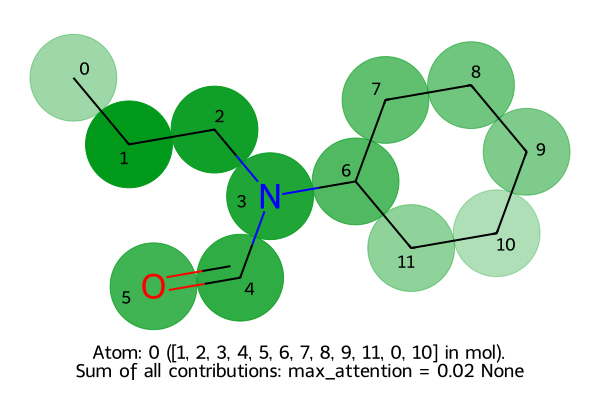

In [53]:
tree.explain_property(mol=test_mol, atom=[1,2,3,4], proprty_name="max_attention", show_property_diff=False)

In [52]:
interact(draw_torsion_histogram, node_path=fixed(node_path), i=widgets.IntSlider(min=1, max=len(node_path)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=9, min=1), Output()), _dom_classes=('widget-i…

<function __main__.draw_torsion_histogram(node_path, i)>

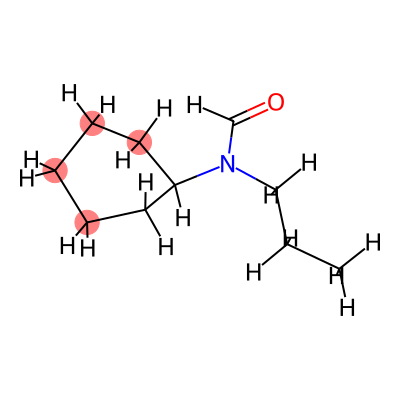

In [46]:
Draw.MolToImage(test_mol, size=(400,400), highlightAtoms=[7,8,9,10])

In [47]:
node_path2 = tree.match_new_torsion(atoms_in_torsion=[7,8,9,10], mol=test_mol)
print(node_path2)

[23232323, 0, 3165, 5062, 5063, 5104, 5105, 5108, 5109, 5110]


In [48]:
interact(draw_torsion_histogram, node_path=fixed(node_path2), i=widgets.IntSlider(min=1, max=len(node_path2)-1, step=1, value=1, description="Node"))

interactive(children=(IntSlider(value=1, description='Node', max=9, min=1), Output()), _dom_classes=('widget-i…

<function __main__.draw_torsion_histogram(node_path, i)>